In [1]:
#Modarres - Ex 4.33

from sympy import *
init_session()
from sympy.stats import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


F, a, b, R, mttf, l =symbols('F a b R mttf l')

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
df = pd.read_excel("ex 4.33 - Kaplan Meier.xlsx")

In [3]:
kaplan=df.iloc[1:]

In [4]:
kaplan


,a,b,c,d,e,f,g,h,i
1,1,NaN,298,10,0.9,0.9,0.009,0.1,0.0111111
2,2,NaN,492,9,0.888889,0.8,0.016,0.2,0.0138889
3,3,NaN,692,8,0.875,0.7,0.021,0.3,0.0178571
4,4,NaN,850,7,0.857143,0.6,0.024,0.4,0.0238095
5,5,NaN,980,6,0.833333,0.5,0.025,0.5,0.0333333
6,6,+,1200,5,1,0.5,0.025,0.5,0
7,7,+,1200,4,1,0.5,0.025,0.5,0
8,8,+,1200,3,1,0.5,0.025,0.5,0
9,9,+,1200,2,1,0.5,0.025,0.5,0
10,10,+,1200,1,1,0.5,0.025,0.5,0


In [5]:
kaplan['c']

1      298
2      492
3      692
4      850
5      980
6     1200
7     1200
8     1200
9     1200
10    1200
Name: c, dtype: object

In [6]:
tempos = np.array(kaplan['c'])

In [7]:
tempos

array([298, 492, 692, 850, 980, 1200, 1200, 1200, 1200, 1200],
      dtype=object)

In [8]:
confiabilidade = np.array(kaplan['f'])

In [9]:
confiabilidade

array([0.9, 0.7999999999999999, 0.7, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
      dtype=object)

In [10]:
Totaltime = np.sum(tempos)
Totaltime

In [11]:
l=5/Totaltime

In [12]:
l

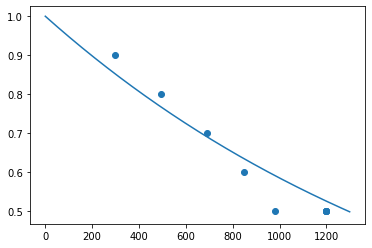

In [13]:
vector = np.arange(0,1300)
R=exp(-l*t)
def predict(time):
    return R.subs({t:time})

predict_v = np.vectorize(predict)
plt.plot(vector, predict_v(vector))
plt.scatter(kaplan['c'],kaplan['f']) 

In [20]:
X_axis = (tempos[:5])
Y_axis = (confiabilidade[:5])






slope = (len(X_axis) * np.sum(X_axis*Y_axis) - np.sum(X_axis) * np.sum(Y_axis)) / (len(X_axis)*np.sum(X_axis*X_axis) - np.sum(X_axis) ** 2)
bias = (np.sum(Y_axis) - slope *np.sum(X_axis)) / len(X_axis)

print('slope: {}  bias:{}'.format(slope, bias))


slope: -0.0005763762069759596  bias:1.0817915995008756


In [23]:
a=1
b=0
while a>0.5:
    b=b+0.1
    a=slope*b+bias
media=b


media: 1009.400000000161  desvio p:589.8000000001341


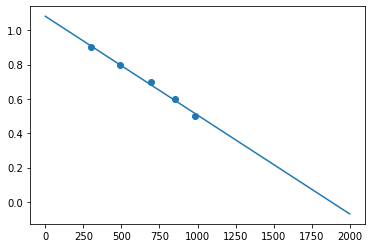

In [29]:
a=1
b=0
while a>0.84:
    b=b+0.1
    a=slope*b+bias
sigma=media-b



print('media: {}  desvio p:{}'.format(media,sigma))
def predict3(tp):
    return slope*tp+bias
ranget=np.arange(0,2000)
plt.plot(ranget,predict3(ranget))
plt.scatter(X_axis,Y_axis)

#def normalcdf(tp):
  #  return (0.5+0.5*)